# **Naive Bayes Classification**
## **Klasyfikacja Naiwnym Bayesem**

---

### **Overview / Przegląd**

Naive Bayes is a family of probabilistic classifiers based on Bayes' theorem with the "naive" assumption of conditional independence between features. Despite this strong assumption, it often performs well in practice.

Naiwny Bayes to rodzina klasyfikatorów probabilistycznych opartych na twierdzeniu Bayesa z "naiwnym" założeniem o warunkowej niezależności między cechami. Mimo tego silnego założenia, często działa dobrze w praktyce.

### **Mathematical Foundation / Podstawy matematyczne**

**Bayes' Theorem / Twierdzenie Bayesa:**
$$P(y|X) = \frac{P(X|y) \cdot P(y)}{P(X)}$$

**Naive Bayes Assumption / Założenie Naiwnego Bayesa:**
$$P(x_1, x_2, ..., x_n|y) = \prod_{i=1}^{n} P(x_i|y)$$

**Classification Rule / Reguła klasyfikacji:**
$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i|y)$$

### **Types of Naive Bayes / Typy Naiwnego Bayesa:**
1. **Gaussian NB** - for continuous features / dla cech ciągłych
2. **Multinomial NB** - for discrete counts / dla dyskretnych zliczeń  
3. **Bernoulli NB** - for binary/boolean features / dla cech binarnych


In [1]:
# Import required libraries / Importowanie wymaganych bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_iris, load_wine, fetch_20newsgroups
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set style for plots / Ustawienie stylu wykresów
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully / Biblioteki zaimportowane pomyślnie")


Libraries imported successfully / Biblioteki zaimportowane pomyślnie


=== GAUSSIAN NAIVE BAYES ===
Iris Dataset - Gaussian NB Accuracy: 0.911


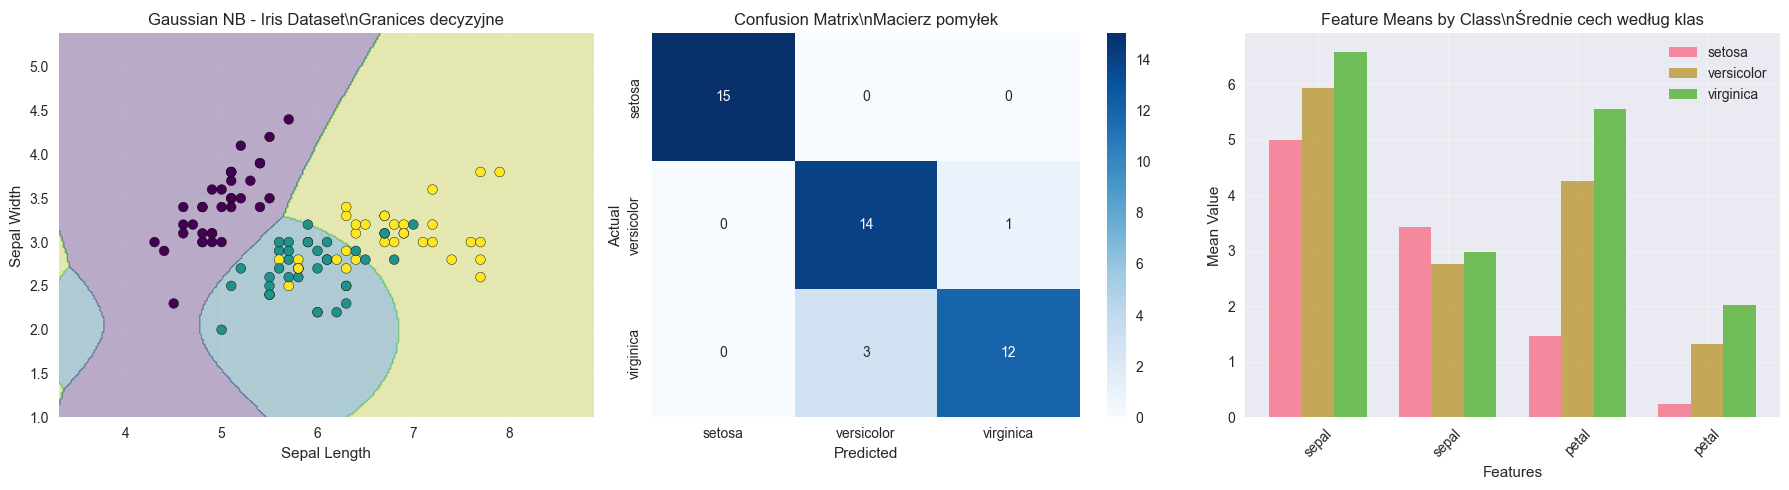

In [2]:
# 1. Gaussian Naive Bayes - Continuous Features / Gaussowski Naiwny Bayes - cechy ciągłe
print("=== GAUSSIAN NAIVE BAYES ===")

# Load Iris dataset / Wczytanie zbioru danych Iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Split the data / Podział danych
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

# Create and train Gaussian NB / Tworzenie i trenowanie Gaussowskiego NB
gnb = GaussianNB()
gnb.fit(X_train_iris, y_train_iris)

# Make predictions / Przewidywania
y_pred_iris = gnb.predict(X_test_iris)
accuracy_iris = accuracy_score(y_test_iris, y_pred_iris)

print(f"Iris Dataset - Gaussian NB Accuracy: {accuracy_iris:.3f}")

# Visualize decision boundaries for 2D / Wizualizacja granic decyzyjnych dla 2D
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Use first two features for visualization / Użycie pierwszych dwóch cech do wizualizacji
X_2d = X_iris[:, :2]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

gnb_2d = GaussianNB()
gnb_2d.fit(X_train_2d, y_train_2d)

# Plot decision boundary / Rysowanie granicy decyzyjnej
def plot_decision_boundary(X, y, classifier, title, ax):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='black')
    ax.set_title(title)
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')
    ax.grid(True, alpha=0.3)
    return scatter

plot_decision_boundary(X_train_2d, y_train_2d, gnb_2d, 
                      'Gaussian NB - Iris Dataset\\nGranices decyzyjne', axes[0])

# Confusion matrix / Macierz pomyłek
cm = confusion_matrix(y_test_iris, y_pred_iris)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names, ax=axes[1])
axes[1].set_title('Confusion Matrix\\nMacierz pomyłek')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Feature importance (class conditional probabilities) / Ważność cech
feature_names = iris.feature_names
class_names = iris.target_names

# Calculate mean and variance for each class and feature / Obliczenie średniej i wariancji
means = []
for class_idx in range(len(class_names)):
    class_data = X_iris[y_iris == class_idx]
    class_means = np.mean(class_data, axis=0)
    means.append(class_means)

means = np.array(means)

# Plot feature means by class / Wykres średnich cech według klas
x_pos = np.arange(len(feature_names))
width = 0.25

for i, class_name in enumerate(class_names):
    axes[2].bar(x_pos + i*width, means[i], width, label=class_name, alpha=0.8)

axes[2].set_xlabel('Features')
axes[2].set_ylabel('Mean Value')
axes[2].set_title('Feature Means by Class\\nŚrednie cech według klas')
axes[2].set_xticks(x_pos + width)
axes[2].set_xticklabels([name.split()[0] for name in feature_names], rotation=45)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# **Naive Bayes**  
### *Naiwny Bayes*

---

## **English**

Naive Bayes is a family of probabilistic classifiers based on Bayes' theorem with the "naive" assumption of conditional independence between features. Despite this strong assumption, Naive Bayes often performs surprisingly well in real-world applications, especially for text classification.

### **Key Concepts**

1. **Bayes' Theorem**: Foundation of the algorithm
2. **Conditional Independence**: "Naive" assumption that features are independent
3. **Prior Probability**: Probability of each class before seeing evidence
4. **Likelihood**: Probability of evidence given the class
5. **Posterior Probability**: Updated probability after seeing evidence

### **Mathematical Foundation**

#### **Bayes' Theorem**
$$
P(y|x_1, ..., x_n) = \frac{P(y) \cdot P(x_1, ..., x_n|y)}{P(x_1, ..., x_n)}
$$

#### **Naive Independence Assumption**
$$
P(x_1, ..., x_n|y) = \prod_{i=1}^{n} P(x_i|y)
$$

#### **Classification Rule**
$$
\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i|y)
$$

### **Types of Naive Bayes**

#### **1. Gaussian Naive Bayes**
- **Use Case**: Continuous features
- **Assumption**: Features follow normal distribution
- **Formula**: 
$$
P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_y^2}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma_y^2}\right)
$$

#### **2. Multinomial Naive Bayes**
- **Use Case**: Discrete features (text classification, word counts)
- **Assumption**: Features follow multinomial distribution
- **Formula**: 
$$
P(x_i|y) = \frac{N_{yi} + \alpha}{N_y + \alpha n}
$$

#### **3. Bernoulli Naive Bayes**
- **Use Case**: Binary features (presence/absence)
- **Assumption**: Features are binary
- **Formula**: 
$$
P(x_i|y) = P(i|y) x_i + (1 - P(i|y))(1 - x_i)
$$

### **Advantages**
- **Fast and Simple**: Quick to train and predict
- **Small Data**: Works well with small datasets
- **Multi-class**: Naturally handles multiple classes
- **Text Classification**: Excellent for NLP tasks
- **Baseline**: Good starting point for classification problems
- **No Hyperparameters**: Minimal tuning required

### **Disadvantages**
- **Independence Assumption**: Rarely true in real data
- **Continuous Features**: May not work well without discretization
- **Zero Probability**: Issues with unseen feature combinations
- **Calibration**: Probability estimates can be poor

### **Applications**
- **Spam Detection**: Email classification
- **Sentiment Analysis**: Text sentiment classification
- **Medical Diagnosis**: Symptom-based diagnosis
- **Recommendation Systems**: Content-based filtering
- **Real-time Predictions**: Fast classification needs

### **Smoothing Techniques**

#### **Laplace Smoothing (Add-one)**
$$
P(x_i|y) = \frac{N_{yi} + 1}{N_y + n}
$$

#### **Lidstone Smoothing (Add-alpha)**
$$
P(x_i|y) = \frac{N_{yi} + \alpha}{N_y + \alpha n}
$$

---

## **Polish**

Naiwny Bayes to rodzina klasyfikatorów probabilistycznych opartych na twierdzeniu Bayesa z "naiwnym" założeniem niezależności warunkowej między cechami. Pomimo tego silnego założenia, Naiwny Bayes często działa zaskakująco dobrze w rzeczywistych zastosowaniach, szczególnie w klasyfikacji tekstu.

### **Kluczowe pojęcia**

1. **Twierdzenie Bayesa**: Podstawa algorytmu
2. **Niezależność warunkowa**: "Naiwne" założenie, że cechy są niezależne
3. **Prawdopodobieństwo a priori**: Prawdopodobieństwo każdej klasy przed zobaczeniem dowodów
4. **Wiarygodność**: Prawdopodobieństwo dowodów przy danej klasie
5. **Prawdopodobieństwo a posteriori**: Zaktualizowane prawdopodobieństwo po zobaczeniu dowodów

### **Podstawy matematyczne**

#### **Twierdzenie Bayesa**
$$
P(y|x_1, ..., x_n) = \frac{P(y) \cdot P(x_1, ..., x_n|y)}{P(x_1, ..., x_n)}
$$

#### **Naiwne założenie niezależności**
$$
P(x_1, ..., x_n|y) = \prod_{i=1}^{n} P(x_i|y)
$$

#### **Reguła klasyfikacji**
$$
\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i|y)
$$

### **Typy Naiwnego Bayesa**

#### **1. Gaussowski Naiwny Bayes**
- **Przypadek użycia**: Cechy ciągłe
- **Założenie**: Cechy mają rozkład normalny
- **Wzór**: 
$$
P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_y^2}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma_y^2}\right)
$$

#### **2. Wielomianowy Naiwny Bayes**
- **Przypadek użycia**: Cechy dyskretne (klasyfikacja tekstu, liczba słów)
- **Założenie**: Cechy mają rozkład wielomianowy
- **Wzór**: 
$$
P(x_i|y) = \frac{N_{yi} + \alpha}{N_y + \alpha n}
$$

#### **3. Bernoulli Naiwny Bayes**
- **Przypadek użycia**: Cechy binarne (obecność/nieobecność)
- **Założenie**: Cechy są binarne
- **Wzór**: 
$$
P(x_i|y) = P(i|y) x_i + (1 - P(i|y))(1 - x_i)
$$

### **Zalety**
- **Szybki i prosty**: Szybkie trenowanie i przewidywanie
- **Małe dane**: Dobrze działa z małymi zbiorami danych
- **Wieloklasowość**: Naturalnie obsługuje wiele klas
- **Klasyfikacja tekstu**: Doskonały do zadań NLP
- **Baseline**: Dobry punkt wyjścia dla problemów klasyfikacji
- **Brak hiperparametrów**: Minimalne wymagania tuningu

### **Wady**
- **Założenie niezależności**: Rzadko prawdziwe w rzeczywistych danych
- **Cechy ciągłe**: Może nie działać dobrze bez dyskretyzacji
- **Zerowe prawdopodobieństwo**: Problemy z niewidzianymi kombinacjami cech
- **Kalibracja**: Oszacowania prawdopodobieństwa mogą być słabe

### **Zastosowania**
- **Wykrywanie spamu**: Klasyfikacja e-maili
- **Analiza sentymentu**: Klasyfikacja sentymentu tekstu
- **Diagnoza medyczna**: Diagnoza oparta na objawach
- **Systemy rekomendacyjne**: Filtrowanie oparte na treści
- **Przewidywania w czasie rzeczywistym**: Szybka klasyfikacja

### **Techniki wygładzania**

#### **Wygładzanie Laplace'a (Add-one)**
$$
P(x_i|y) = \frac{N_{yi} + 1}{N_y + n}
$$

#### **Wygładzanie Lidstone'a (Add-alpha)**
$$
P(x_i|y) = \frac{N_{yi} + \alpha}{N_y + \alpha n}
$$
